In [16]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
import numpy as np
plt.rcParams['figure.figsize'] = [20, 8]

In [17]:
df = pd.read_csv('./0803Data/duration_survey_df.csv',encoding='utf-16')
df['success'] = df['success'].apply(lambda x : 'success' if x == 1 else 'Fail')

In [18]:
df['duration'].describe()

count    2496.000000
mean      145.456334
std       144.371647
min         0.040000
25%        76.413531
50%       122.231900
75%       180.180000
max      4183.233333
Name: duration, dtype: float64

In [19]:
df.groupby(['success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,144.445573,181.226813,4.495504,68.086769,117.475313,177.591667,4183.233333
success,1266.0,146.438354,95.912496,0.040000,83.298010,125.408479,183.927494,1210.342467


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 1440x576 with 0 Axes>

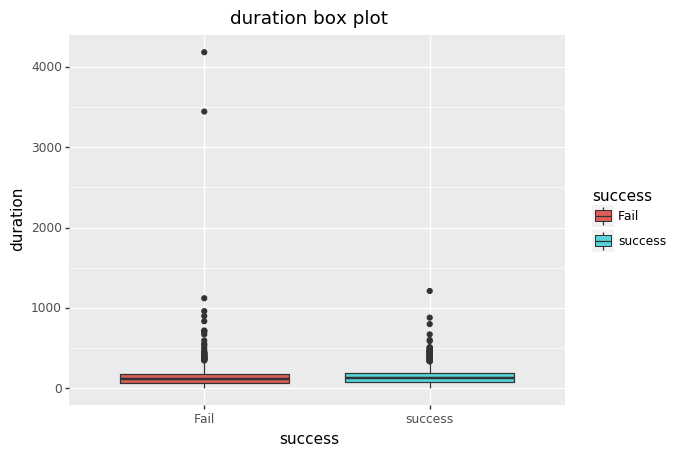

<ggplot: (-9223372036572690663)>

In [20]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(df, aes(x='success', y='duration')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('duration box plot')
video_duration.save('Video duration by success.pdf')
video_duration

In [21]:
df.groupby(['success','super_category'])['duration'].describe()

count        mean         std        min  \
success super_category                                                    
Fail    Arts                   105.0  156.063579  147.550656   8.201653   
        Comics & Illustartion   66.0  141.681895  111.326998   5.000000   
        Design & Tech          286.0  124.385300   88.867361   4.495504   
        Film                   173.0  180.904416  280.264911   5.960000   
        Food & Craft           181.0  128.805441   82.993859   9.800000   
        Games                  192.0  120.239622   74.398517   6.566667   
        Music                   83.0  149.437413  105.551461  12.200000   
        Publishing             144.0  182.337618  350.797418  15.648967   
success Arts                   136.0  153.209020   89.553149   0.040000   
        Comics & Illustartion  165.0  122.005408   68.063363   3.918257   
        Design & Tech          253.0  134.655898   74.950449   0.040000   
        Film                   124.0  179.244736  143.099920  20.000000   
        Food & Craft            74.0  141.628048   74.033681  22.133333   
        Games                  278.0  131.059120   96.695803   8.560000   
        Music                  133.0  185.267925  107.331375   7.166667   
        Publishing             103.0  160.910701   87.816660  23.223200   

                                      25%         50%         75%          max  
success super_category                                                          
Fail    Arts                    81.333333  124.457667  182.832650  1120.085633  
        Comics & Illustartion   70.420833  112.862750  170.251975   702.900000  
        Design & Tech           62.045317  109.048521  162.625000   711.650000  
        Film                    69.702967  149.357542  213.708333  3444.674567  
        Food & Craft            59.958333  113.196417  170.211708   447.733333  
        Games                   68.989583  101.260000  157.287240   593.720000  
        Music                   67.630000  134.198658  193.625000   669.627292  
        Publishing              80.286225  138.598062  215.940725  4183.233333  
success Arts                    97.327083  126.249333  192.614250   474.360000  
        Comics & Illustartion   75.000000  108.108000  146.200000   354.187167  
        Design & Tech           85.866667  124.920000  167.542375   587.416667  
        Film                   104.270833  145.645500  213.523802  1210.342467  
        Food & Craft            91.505000  138.209000  171.458333   444.920000  
        Games                   70.532473  105.362500  167.916850   878.666667  
        Music                  114.656208  174.333333  233.107875   670.466667  
        Publishing              95.426667  150.250100  204.158121   501.200000

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 1440x576 with 0 Axes>

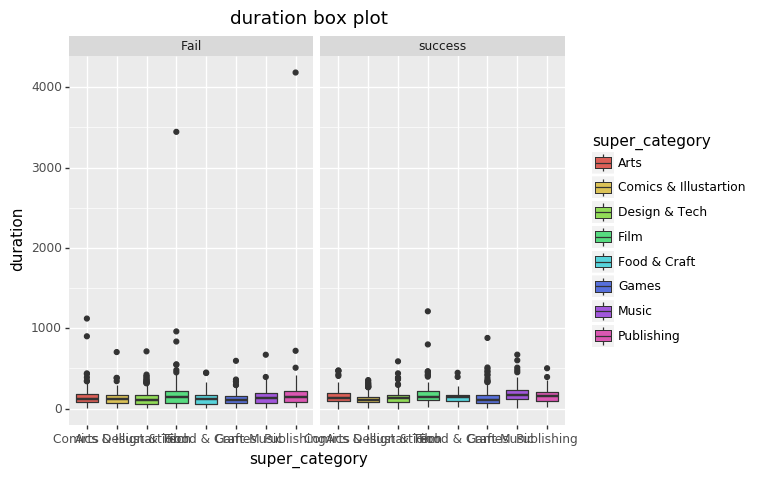

<ggplot: (281599629)>

In [22]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~success')
cat_duration.save('Category video duration by success.pdf')
cat_duration

## 최종 비디오
- 60초 이상 280초 미만

In [23]:
print(df[(df['duration'] > 60) & (df['duration'] < 280)].shape)
Final_video = df[(df['duration'] > 60) & (df['duration'] < 280)]

(1915, 6)


In [24]:
Final_video.groupby(['success'])['success'].count()

success
Fail        892
success    1023
Name: success, dtype: int64

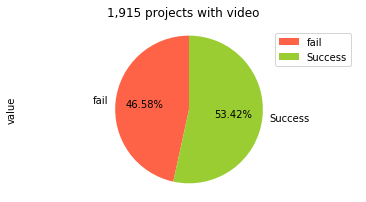

           group  value
fail        fail    892
Success  success   1023
Sum : 1915


In [25]:
group = ['fail','success']
value = Final_video.groupby(['success'])['success'].count().values
pie_df = pd.DataFrame({'group':group,'value':value}, index=['fail','Success'])
total_value = pie_df['value'].sum()
fig = pie_df.plot(kind='pie',y='value',subplots=True, figsize=(6, 3),colors = ['tomato','yellowgreen'],\
                title= '1,915 projects with video', autopct='%.2f%%', startangle=90,shadow=False,\
                fontsize=10)[0]
fig_pie = fig.get_figure()
plt.axis('equal')
plt.show()

fig_pie.savefig('Final_video.pdf')
print(pie_df)
print('Sum : {0}'.format(pie_df['value'].sum()))

In [26]:
Final_video.groupby(['success','super_category'])['duration'].describe()

count        mean        std        min  \
success super_category                                                   
Fail    Arts                    81.0  135.781806  50.406110  62.896167   
        Comics & Illustartion   48.0  139.147945  62.749377  60.875000   
        Design & Tech          198.0  130.718567  51.933993  60.040000   
        Film                   123.0  154.875287  57.706676  60.020000   
        Food & Craft           125.0  145.214736  54.046983  60.050806   
        Games                  152.0  126.168136  50.562241  60.018292   
        Music                   57.0  150.446766  58.443536  60.890005   
        Publishing             108.0  155.753555  59.444665  61.066667   
success Arts                   112.0  142.647776  55.120814  60.299715   
        Comics & Illustartion  131.0  127.792065  49.804372  61.000000   
        Design & Tech          213.0  137.920075  49.983382  61.561500   
        Film                   100.0  150.915053  55.343343  61.728333   
        Food & Craft            66.0  142.053697  53.644420  60.375000   
        Games                  216.0  127.180060  54.526739  60.625000   
        Music                  105.0  167.205170  57.705568  60.314348   
        Publishing              80.0  153.490103  53.031451  60.018292   

                                      25%         50%         75%         max  
success super_category                                                         
Fail    Arts                    94.866667  127.133333  176.075900  256.300000  
        Comics & Illustartion   82.770408  126.965150  168.795925  279.012067  
        Design & Tech           86.965117  121.026917  163.726798  257.900000  
        Film                   110.889946  154.988167  194.319125  279.720000  
        Food & Craft           100.931034  134.000000  176.743233  277.644033  
        Games                   88.122000  110.933333  159.501758  276.541667  
        Music                  107.500000  136.266667  182.098583  279.445833  
        Publishing             111.437500  144.344200  209.553094  279.500000  
success Arts                   102.677575  126.249333  175.462788  279.680000  
        Comics & Illustartion   90.525758  114.766667  150.333517  270.266667  
        Design & Tech           97.200000  130.196733  168.501667  267.720000  
        Film                   110.215719  140.090792  189.584510  279.900000  
        Food & Craft           105.566550  139.880000  171.458333  277.640000  
        Games                   80.780700  112.886350  167.291850  277.277000  
        Music                  122.011463  168.360000  216.749867  274.720000  
        Publishing             113.060000  151.394090  194.041667  269.933333

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Final Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 1440x576 with 0 Axes>

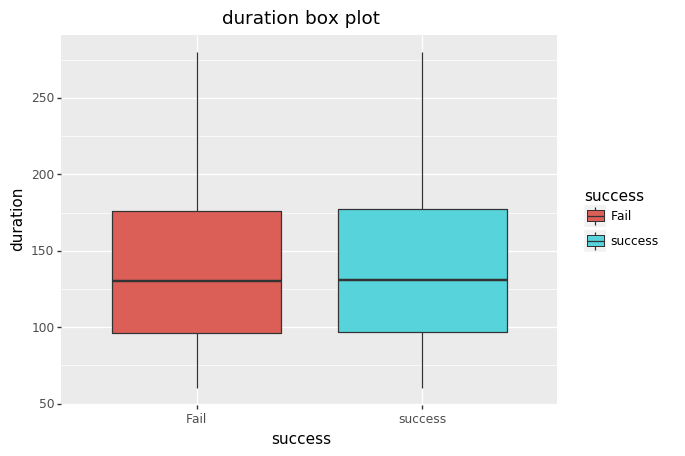

<ggplot: (7530975229)>

In [27]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(Final_video, aes(x='success', y='duration')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('duration box plot')
video_duration.save('Final Video duration by success.pdf')
video_duration

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Final Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 1440x576 with 0 Axes>

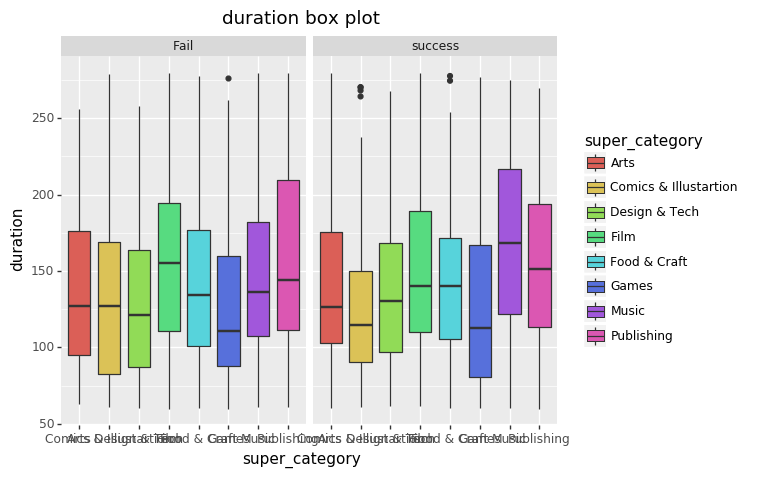

<ggplot: (-9223372036573176765)>

In [28]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(Final_video, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~success')
cat_duration.save('Final Category video duration by success.pdf')
cat_duration

## 최종 Data 저장

In [29]:
Final_video.to_csv('0803_Final_Data.csv',index=False,encoding='utf-16')

In [30]:
Final_video

,project_id,project_title,project_blurb,super_category,success,duration
0,1000414645,The Lake Merritt Monster Short Film,Ollie Henderson is living in a changing Oaklan...,Film,success,195.862333
1,1002877193,Tachyon Rider,A Retro Cyber-Racer and RPG Designed for VR - ...,Games,success,83.950000
2,1002950518,TOURIST: A different kind of comic. Issue 3 & 4,A different kind of trip deserves a different ...,Comics & Illustartion,success,67.634233
3,1003129771,Ni con el pétalo de una Rosa (Cortometraje),Cortometraje que busca transmitir de manera ar...,Film,Fail,104.320000
5,1006560474,Key Pocket Limited Edition- Minimalism Perfected,"The Third Edition of the Key Pocket, is the pe...",Design & Tech,success,62.946217
6,1006860742,Moonshine Ridge Inc tasting room in Johnson Ci...,"Hello, We are a small batch distillery making ...",Food & Craft,Fail,166.366667
7,1007380498,A Storefront for LUX Artisan Chocolates,A storefront and tasting room for LUX Artisan ...,Food & Craft,Fail,159.617792
8,1009113591,Drone Maps: RPG and Wargames Maps,"17MP photos and 4K video maps, for fantasy, sc...",Games,success,151.560000
9,1009121545,Gideon Ira: Knight of the Blood Cross,The first book in a new heavy metal Christian ...,Publishing,success,171.791380
10,1009383623,Alba (Daybreak) Short Film,"After fleeing a drug cartel, a boy must let hi...",Film,Fail,236.486250
